# Exploratory Data Analysis using Python

### Import and reading the data: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as mplb
import seaborn as sns
mplb.style.use('ggplot')
#pd.set_option('max_columns', 200)

In [3]:
df = pd.read_csv('/kaggle/input/rollercoaster-database/coaster_db.csv')

### 1. Inspection of data

In [4]:
df.shape

(1087, 56)

In [5]:
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [6]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [7]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [8]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


### 2. Data Cleaning

In [9]:
# Considering only required columns:

In [10]:
df = df[['coaster_name',
         'Location',
         'Status', 
         'Manufacturer',
         'year_introduced',
         'latitude', 
         'longitude', 
         'Type_Main',
         'opening_date_clean',
         'speed_mph',
         'height_ft',
         'Inversions_clean', 
         'Gforce_clean']].copy()


In [11]:
df.shape

(1087, 13)

In [12]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [13]:
# changing the data type of column 'opening_date_clean' to datetime:

In [14]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [15]:
df['year_introduced'].dtype

dtype('int64')

In [16]:
# Renaming the columns:

In [17]:
df = df.rename(columns={'coaster_name':'Coaster_Name',
                    'year_introduced':'Year_Introduced',
                    'latitude':'Latitude',            
                    'longitude':'Longitude',                   
                    'opening_date_clean':'Opening_Date',
                    'speed_mph':'Speed_mph',
                    'height_ft':'Height_ft',
                    'Inversions_clean':'Inversions',  
                    'Gforce_clean':'Gforce'})

In [18]:
# finding the missing values:

In [19]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [20]:
# finding duplicates: 

In [21]:
# checking if any two rows are same:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [22]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [23]:
# checking the duplicates on subset of columns:

In [24]:
# let's check if there are any duplicated cosater names
df.duplicated(subset=['Coaster_Name'])

# shows there are some duplicatets.

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [25]:
# Let's check this list with df.loc[], it will display the rows the second time they occur 
# and are duplicated.

df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [26]:
df.loc[df.duplicated(subset=['Coaster_Name'])].head(5)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [27]:
# checking why we have duplicate values using an example, by using the query():

df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [28]:
# find duplicates with subset of columns.
df.duplicated(subset=['Coaster_Name','Location','Opening_Date']).sum()

# found 97 rows with duplicates with mentioned columns criteria.

97

In [29]:
# Lets select the rows which are not duplicate
df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])]


,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
1081,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [30]:
# if we notice the Index column no.s are not 
# continues series after subseting the data set without duplicates.
# we can maintain that correct index using reset_index().

df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].\
reset_index(drop=True)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [31]:
# copy into our dataframe:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].\
reset_index(drop=True).copy()

In [32]:
df.shape

# final data set with 990 unique roller coasters.

(990, 13)

In [33]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


### 3. Understanding distribution of different features (Univariant analysis)  

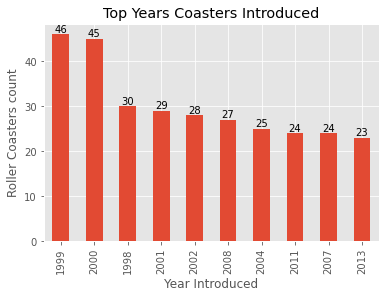

In [34]:
ax = df['Year_Introduced'].value_counts()\
    .head(10)\
    .plot(kind='bar', title='Top Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Roller Coasters count')
ax.bar_label(ax.containers[0], label_type='edge')
mplb.show()

Text(55.00000000000001, 45.675, 'Median: 50.00')

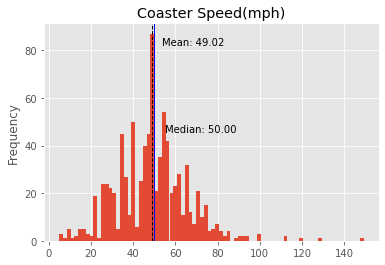

In [35]:
ax = df['Speed_mph'].plot(kind='hist',
                          bins = 80, 
                          title='Coaster Speed(mph)')
m=df['Speed_mph'].mean()
md=df['Speed_mph'].median()

ax.axvline(m, 
           color='black', 
           linestyle='dashed', 
           linewidth=1)

ax.axvline(md, 
           color='blue', 
           linestyle='solid', 
           linewidth=1)


min_ylim, max_ylim = mplb.ylim()

ax.text(m*1.1,max_ylim*0.9,'Mean: {:.2f}' .format(m))
ax.text(md*1.1,max_ylim*0.5,'Median: {:.2f}' .format(md))


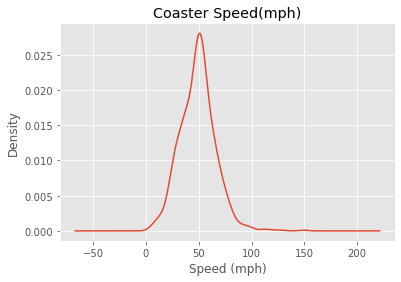

In [36]:
ax = df['Speed_mph'].plot(kind='kde',
                          title='Coaster Speed(mph)')
ax.set_xlabel('Speed (mph)')
mplb.show()

### 4. Feature relationships

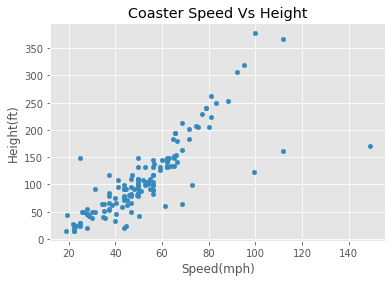

In [37]:
ax = df.plot(kind='scatter', x='Speed_mph', y='Height_ft', title='Coaster Speed Vs Height',)
ax.set_xlabel('Speed(mph)')
ax.set_ylabel('Height(ft)')
mplb.show()

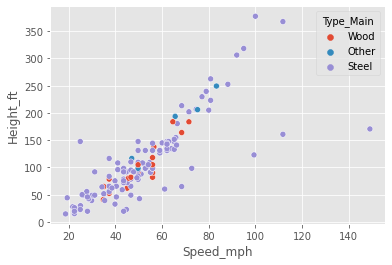

In [38]:
sns.scatterplot(x='Speed_mph', 
                y='Height_ft',
                hue='Type_Main',
               data=df)
mplb.show()

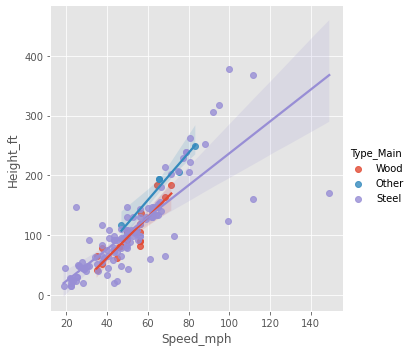

In [39]:
sns.lmplot(x='Speed_mph', 
           y='Height_ft',
           hue='Type_Main',
           data=df)
#sns.color_palette
mplb.show()

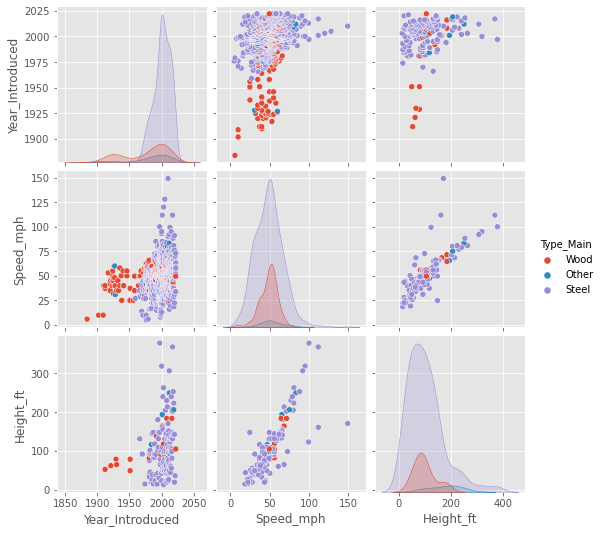

In [40]:
sns.pairplot(df, 
             vars=['Year_Introduced','Speed_mph','Height_ft'],
             hue='Type_Main')

In [41]:
# let's check the correlation between features:
df_corr = df[['Year_Introduced','Speed_mph','Height_ft']].dropna().corr()

<AxesSubplot:>

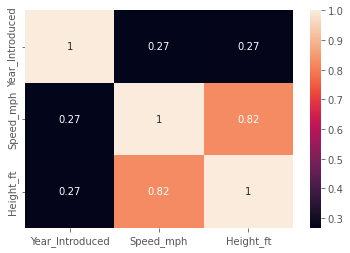

In [42]:
sns.heatmap(df_corr,annot=True)

### 5. Asking question about data

#### (i) Which location with fastest roller coasters? 

In [46]:
df[['Location','Speed_mph']].sort_values(by='Speed_mph',ascending=False).head(5)

,Location,Speed_mph
758,Ferrari World Abu Dhabi,149.1
648,Six Flags Great Adventure,128.0
608,Cedar Point,120.0
540,Fuji-Q Highland,111.8
912,Ferrari Land,111.8


#### (ii) What are the locations with fastest roller coasters? 

In [49]:
df.query('Location != "Other"')\
    .groupby('Location')['Speed_mph']\
    .agg(['max','count'])\
    .query('count >= 10')\
    .sort_values('max',ascending=False)

,max,count
Location,,
Six Flags Great Adventure,128.0,11
Cedar Point,120.0,18
Carowinds,95.0,14
Canada's Wonderland,92.0,12
Kings Island,91.0,19
Kings Dominion,90.0,12
Six Flags Magic Mountain,85.0,17
Hersheypark,76.0,13
Busch Gardens Williamsburg,73.0,11


<AxesSubplot:ylabel='Location'>

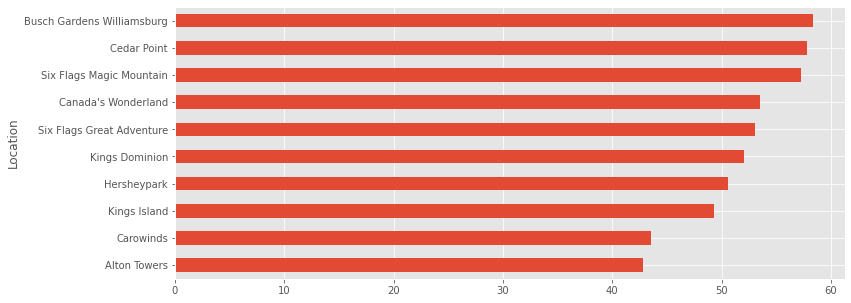

In [53]:
df.query('Location != "Other"')\
    .groupby('Location')['Speed_mph']\
    .agg(['mean','count'])\
    .query('count >= 10')\
    .sort_values('mean')['mean']\
    .plot(kind='barh', figsize=(12,5))